<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Чтение-файла-с-данными-и-изучение-общей-информации" data-toc-modified-id="Шаг-1.-Чтение-файла-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Чтение файла с данными и изучение общей информации</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Шаг-3.-Аналитика" data-toc-modified-id="Шаг-3.-Аналитика-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Аналитика</a></span></li><li><span><a href="#Шаг-4.-Общий-вывод" data-toc-modified-id="Шаг-4.-Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Общий вывод</a></span></li></ul></div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Чтение файла с данными и изучение общей информации

Первое представление о данных. 

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Прочитаем файл и запишем его в переменную `df`.

In [3]:
df = pd.read_csv('/datasets/data.csv') # чтение файла с данными и сохранение в df
df.head(10) # получение первых 10 строк таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Общая информация о таблице:

In [4]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице двенадцать столбцов. Тип данных в столбцах: `object`, `int64`, `float64`.

Согласно документации к данным:

* children — количество детей в семье;
* days_employed — общий трудовой стаж в днях;
* dob_years — возраст клиента в годах;
* education — уровень образования клиента;
* education_id — идентификатор уровня образования;
* family_status — семейное положение;
* family_status_id — идентификатор семейного положения;
* gender — пол клиента;
* income_type — тип занятости;
* debt — имел ли задолженность по возврату кредитов;
* total_income — ежемесячный доход;
* purpose — цель получения кредита.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Вывод**

В каждой строке таблицы — данные о клиенте банка, а точнее о его платежеспособности. Данные описывают информацию необходимую для дальнейшего построения модели кредитного скоринга.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Также встречаются пропуски в данных, которые необходимо устранить.

## Шаг 2. Предобработка данных

### Обработка пропусков

Посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов pandas:

In [5]:
df.isna().sum() # подсчёт пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Также посмотрим удельную долю пропущенных значений в структуре.

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

children - 0%
days_employed - 10%
dob_years - 0%
education - 0%
education_id - 0%
family_status - 0%
family_status_id - 0%
gender - 0%
income_type - 0%
debt - 0%
total_income - 10%
purpose - 0%


Пропуски данных в относительном выражении составляют значительную велечину в структуре данных и поэтому их необходимо заполнить.

**Вывод**

Пропуски встретились нам в двух столбцах:

* days_employed;
* total_income.

Среди причин пропущеных значений в таблице может быть:

* Ошибки ввода данных;
* Пользователь специально указал ложные данные.

К сожалению пропуски встретились в важных столбцах, придётся заполнить и эти пропуски явными обозначениями.

In [7]:
data_transformed_total_income = df.groupby('income_type')['total_income'].transform('mean')
df['total_income'] = df['total_income'].fillna(data_transformed_total_income)

data_transformed_days_employed = df.groupby('income_type')['days_employed'].transform('mean')
df['days_employed'] = df['days_employed'].fillna(data_transformed_days_employed)

In [8]:
df.isna().sum() # повторыный подсчёт пропусков, после применения метода fillna()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

После замены пропущенных значений в таблице не осталось пропусков их место заняла медиана.

### Замена типа данных

In [9]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В наших данных есть два столбца с типом данных float64. Это столбцы:

* days_employed;
* total_income.

Заменим тип данных этих столбцов на int64. Убрав копейки и дробные части в стаже мы ничего существенного для анализа не потеряем, зато с типом данных int64 мы получим точные данные, так как данные типа float64 хранятся не точно, а лишь с некоторым приближением, иногда это может приводить к багам.   

In [10]:
df['days_employed'] = df['days_employed'].astype('int') # замена типа данных в столбце days_employed
df['total_income'] = df['total_income'].astype('int') # замена типа данных в столбце total_income

После замены типа данных, проверим информацию по нашей таблице.

In [11]:
df.info() # получение общей информации после замены типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

Тип данных изменен, в дальнейшем это поможет нам в получении необходимых данных для банка.

### Обработка дубликатов

Подсчет явных дубликатов в таблице:

In [12]:
df.duplicated().sum() # подсчёт явных дубликатов

54

Вызовем метод drop_duplicates() для удаления явных дубликатов.

In [13]:
df = df.drop_duplicates().reset_index(drop=True) # удаление явных дубликатов (с удалением старых индексов и формированием новых)

Проверка дубликатов после их удаления:

In [14]:
df.duplicated().sum() # проверка на отсутствие дубликатов

0

Явные дубликаты удалены. Теперь избавимся от неявных дубликатов в колонке education. 

Выведем на экран список уникальных значений столбца education и отсортируем в алфавитном порядке для наглядности. Для этого:

* извлечем нужный столбец датафрейма;
* применим к нему метод сортировки;
* для отсортированного столбца используем метод unique(), он вернёт уникальные значения из столбца.

In [15]:
df['education'].sort_values().unique() # Просмотр уникальных названий столбца education

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

В значениях столбца education находятся одинаковые значения, но они записаны в разном регистре. Для того чтобы убрать неявные дубликаты приведем значения столбца education к единому регистру методом str.lower().

In [16]:
df['education'] = df['education'].str.lower() # приведем данные столбца к нижнему регистру

Проверка данных после изменения:

In [17]:
df['education'].sort_values().unique() # Просмотр уникальных названий столбца education после применения специального метода

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

Все значения стали строчными, мы добились того чего хотели

Далее рассмотрим значения столбца children

In [18]:
df['children'].sort_values().unique() # Просмотр уникальных значений столбца children

array([-1,  0,  1,  2,  3,  4,  5, 20])

Видно что нам попались необычные значения количества детей у заемщика, например -1 и 20, что является подозрительным и от этого нужно избавиться. Такие значения могли быть ошибкой человека, который заполнял данные. Можно предположить что значение -1 является на самом деле 1, а значение 20 - 2.  

Для наглядности можно построить диаграммы: гистограмму и коробчатую диаграмму.

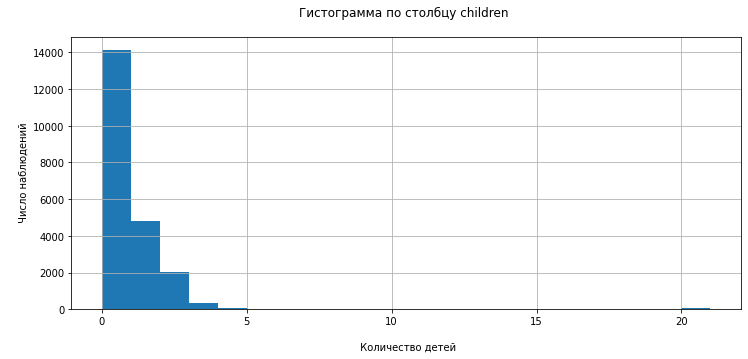

In [19]:
df['children'].hist(bins=21, range=(0,21), figsize=(12,5)) # построение гистограммы по столбцу children

plt.title('Гистограмма по столбцу children \n')
plt.xlabel('\n Количество детей')
plt.ylabel('\n Число наблюдений')
plt.show()

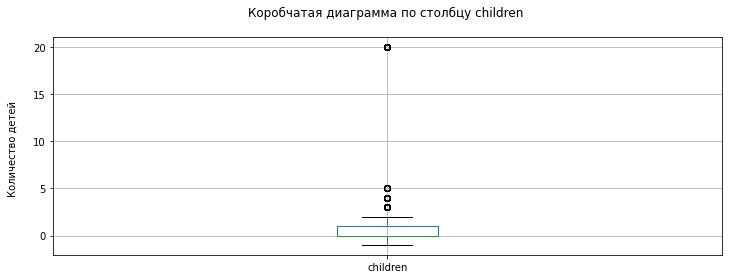

In [20]:
df.boxplot(column=['children'], figsize=(12,4)) # построение коробчатой диаграммы по столбцу children

plt.title('Коробчатая диаграмма по столбцу children \n')
plt.ylabel('Количество детей \n')
plt.show()

Произведем замену подозрительных значений и проверим что получилось.

In [21]:
# замена значений на более реалистичные
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)

df['children'].sort_values().unique() # вывод уникальных значений столбца children

array([0, 1, 2, 3, 4, 5])

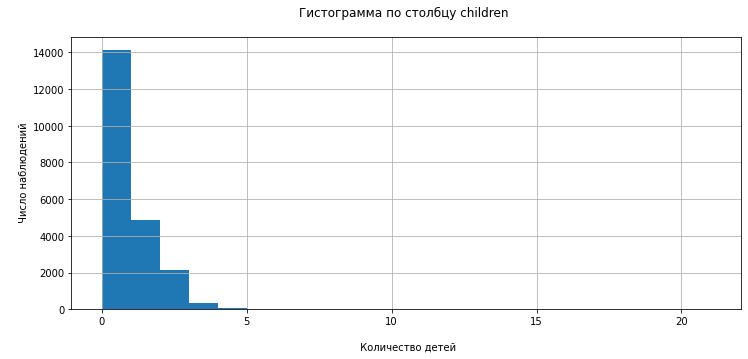

In [22]:
df['children'].hist(bins=21, range=(0,21), figsize=(12,5)) # построение гистограммы по столбцу children после замены значений -1 и 20

plt.title('Гистограмма по столбцу children \n')
plt.xlabel('\n Количество детей')
plt.ylabel('\n Число наблюдений')
plt.show()

Замена значений столбца children произошла успешно, мы получили точные данные.

Далее рассмотрим значения столбца family_status. В дальнейшем эти данные нам понадобятся для анализа.

In [23]:
df['family_status'].sort_values().unique()

array(['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'], dtype=object)

Данные столбца family_status подходят для анализа, ничего менять не будем.

**Вывод**

Все дубликаты в столбцах, которые мы будем использовать в наших целях обработаны.

### Лемматизация

Для решения задачи, необходимо использовать лемматизацию, импортируем библиотеку pymystem3 для лемматизации столбца purpose, в котором содержатся цели кредита.

In [24]:
# импорт pymystem3 :
from pymystem3 import Mystem
m = Mystem() 

In [25]:
# выделим леммы столбца purpose и выведем результат 
lemmas = df['purpose'].apply(m.lemmatize)
df['lemmas'] = lemmas
print(lemmas.head(10))

0                      [покупка,  , жилье, \n]
1            [приобретение,  , автомобиль, \n]
2                      [покупка,  , жилье, \n]
3         [дополнительный,  , образование, \n]
4                    [сыграть,  , свадьба, \n]
5                      [покупка,  , жилье, \n]
6               [операция,  , с,  , жилье, \n]
7                            [образование, \n]
8          [на,  , проведение,  , свадьба, \n]
9    [покупка,  , жилье,  , для,  , семья, \n]
Name: purpose, dtype: object


Далее необходимо рассмотреть какие леммы встречались нам в процессе лемматизации.

In [26]:
lemmas.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[автомобиль, \n]                                          972
[свадьба, \n]                                             793
[на,  , проведение,  , свадьба, \n]                       773
[сыграть,  , свадьба, \n]                                 769
[операция,  , с,  , недвижимость, \n]                     675
[покупка,  , коммерческий,  , недвижимость, \n]           662
[покупка,  , жилье,  , для,  , сдача, \n]                 652
[операция,  , с,  , жилье, \n]                            652
[операция,  , с,  , коммерческий,  , недвижимость, \n]    650
[покупка,  , жилье, \n]                                   646
[жилье, \n]                                               646
[покупка,  , жилье,  , для,  , семья, \n]                 638
[строительство,  , собственный,  , недвижимость, \n]      635
[недвижимость, \n]                                        633
[операция,  , со,  , свой,  , недвижимость, \n]           627
[строительство,  , жилой,  , недвижимость, \n]            625
[покупка

Мы можем выделить такие цели кредита как: покупка автомобиля, свадьба, недвижимость и образование.

**Вывод**

После процесса лематизации мы выделили основные цели кредита. Удивительно сколько кредитов берут на организацию свадьбы, но и про базовые потребности люди не забывают, достаточно много средств берут для покупки или ремонта недвижимости, также берут заемные средства на образование и на покупку автомобиля.

### Категоризация данных

Для решения поставленных задач нам необходимо разбить данные на группы: по количеству детей, по семейному статусу, по уровню дохода и целям кредитования.

In [27]:
total_children_grouped = df.groupby('children').count() # Сохраняем в переменной данные по колличеству детей
total_children_grouped # Выведем результат на экран

,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas
children,,,,,,,,,,,,
0,14107,14107,14107,14107,14107,14107,14107,14107,14107,14107,14107,14107
1,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856
2,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128
3,330,330,330,330,330,330,330,330,330,330,330,330
4,41,41,41,41,41,41,41,41,41,41,41,41
5,9,9,9,9,9,9,9,9,9,9,9,9


Создадим функцию для разбивки на категории по колличеству детей.

In [28]:
def child_group(child):
    if child < 1:
        return 'Бездетные'
    if child >= 3:
        return 'Многодетные'
    if child >= 5:
        return '5+'

Нам необходимо ответить на вопрос есть ли зависимость от наличия детей и возвратом кредита в срок, поэтому я категоризировал данные, но чтобы не уменьшать обьем имеющейся информации я удалил условие (если детей 3 и больше то это многодетная семья).

Далее с помощью метода apply применим функцию child_group к столбцу children и выведем на экран значения полученного столбца.

In [29]:
df['children_group'] = df['children'].apply(child_group)
df['children_group'].value_counts()

Бездетные      14107
Многодетные      380
Name: children_group, dtype: int64

Заемщиков без детей очень много, а вот многодетных семей, которые взяли кредит не так много.

Тоже самое проведем с столбцом total_income и сделаем группы по доходу клиентов.

In [30]:
total_income_grouped = df.groupby('total_income').count()

In [31]:
def income_group(cash):
    if cash >= 150000:
        return 'высокий уровень дохода'
    if cash > 45000 and cash < 150000:
        return 'средний уровень дохода'
    if cash >= 1000 and cash <= 45000:
        return 'низкий уровень дохода'
    
    return 'доход отсутствует'

Также применяем функцию income_group к столбцу total_income и выведем на экран значения столбца income_group.

In [32]:
df['income_group'] = df['total_income'].apply(income_group)
df['income_group'].value_counts()

высокий уровень дохода    10910
средний уровень дохода    10344
низкий уровень дохода       217
Name: income_group, dtype: int64

Заемщики с средним уровнем дохода больше половины, также достаточно много заемщиков с средним уровнем дохода.

И еще нам необходимо группировать данные по целям кредитования, проделаем все то, что делали ранее, для этого создадим функцию lemmas_group, применим ее к столбцу lemmas и выведем ее на экран.

In [33]:
def lemmas_group(lemmas):
    if 'автомобиль' in lemmas:
        return 'автомобиль'
    if 'свадьба' in lemmas:
        return 'свадьба'
    if 'образование' in lemmas:
        return 'образование'
    if 'недвижимость' or 'жилье' in lemmas:
        return 'недвижимость'


In [34]:
df['purpose_group'] = df['lemmas'].apply(lemmas_group)
df['purpose_group'].value_counts()

недвижимость    10814
автомобиль       4308
образование      4014
свадьба          2335
Name: purpose_group, dtype: int64

Чаще всего средства используются на недвижимость, примерно столько же в сумме дают колличество кредитов на авто и образование.

**Вывод**

Данные таблицы разбиты по категориям и на следущем этапе мы узнаем как зависят различные факторы на возврат кредита в срок.

## Шаг 3. Аналитика

**Есть ли зависимость между наличием детей и возвратом кредита в срок?**

Для того чтобы ответить на вопрос используем метод pivot_table и сделаем сводную таблицу. 

In [37]:
# сделаем сводную таблицу и посмотрим сколько должников находится в разных группах по колличеству детей, выведем результат на экран
data_pivot_children = df.pivot_table(index='children_group',columns='debt', values='children', aggfunc='count')
data_pivot_children

debt,0,1
children_group,,
Бездетные,13044,1063
Многодетные,349,31


Клиенты с просрочкой платежа есть в каждой группе, это не удивительно. Чтобы подробнее рассмотреть полученные результаты создадим столбец ratio, в котором рассмотрим относительную велечину каждой из групп.

In [38]:
# добавим столбец ratio, поделим колличество клиентов у которых была задолженность на клиентов у которых не было просрочек по кредитам
data_pivot_children['ratio'] = data_pivot_children[1] / data_pivot_children[0]
# сортируем полученный столбец и выведем его на экран
data_pivot_children.sort_values(by='ratio', ascending=False)

debt,0,1,ratio
children_group,,,
Многодетные,349,31,0.088825
Бездетные,13044,1063,0.081493


**Вывод**

Полученные результаты показывают нам, что 9 процентов из тех семей где много детей имели просроченную задолженность по кредиту, а клиенты у которых нет детей совершают меньше просрочек. Можно предположить что у людей без детей меньше ответственности за свою семью и средств остается больше, чего хватает на покрытие своих долгов.

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Для решения этого вопроса и последующих используем те же действия, что и ранее. Создадим сводную таблицу методом pivot_table.

In [39]:
# сделаем сводную таблицу и посмотрим сколько должников находится в разных группах по семейному положению, выведем результат на экран
data_pivot_family = df.pivot_table(index='family_status',columns='debt', values='family_status_id', aggfunc='count')
data_pivot_family

debt,0,1
family_status,,
Не женат / не замужем,2536,274
в разводе,1110,85
вдовец / вдова,896,63
гражданский брак,3775,388
женат / замужем,11413,931


Клиенты с просрочкой платежа есть в каждой группе. Также создадим столбец ratio, в котором рассмотрим относительную велечину каждой из групп.

In [40]:
# добавим столбец ratio, поделим колличество клиентов у которых была задолженность на клиентов у которых не было просрочек по кредитам
data_pivot_family['ratio'] = data_pivot_family[1] / data_pivot_family[0]
# сортируем полученный столбец и выведем его на экран
data_pivot_family.sort_values(by='ratio', ascending=False)

debt,0,1,ratio
family_status,,,
Не женат / не замужем,2536,274,0.108044
гражданский брак,3775,388,0.102781
женат / замужем,11413,931,0.081574
в разводе,1110,85,0.076577
вдовец / вдова,896,63,0.070312


**Вывод**

Люди которые не состоят в браке чаще имели задолженность по кредиту, похожий результат имеет группа клиентов которые состоят в гражданском браке. Люди которые находятся в разводе и люди которые потеряли своих супругов, реже имеют просрочки по кредитам, чем остальные. 

Могу предположить такие версии:

* Люди в разводе или те которые лишились супруга, находяться в депрессивном состоянии и им необходимо решать свои проблемы среди которых кредит и чтобы компенсировать свое состояние после ухода второй половинки, они решают личные проблемы и тем самым делают свою жизнь проще и легче. Так же могу отметить то что вдовцы и вдовы получают наследство и с помощью него могут закрыть свои долги перед банком. 
* Люди которые не состоят в браке или состоят в гражданском браке, чаще имеют задолженность по кредитам чем остальные группы, могу предположить, что это связанно с молодым возрастом так как многие еще не успели вступаить в брак или вступают в него и берут кредиты на свадьбу, а если это молодые люди то фин. грамотность, может страдать из-за отсутствия опыта обращения с денежными средствами, отсюда и кредиты на свадьбу и просрочки.


**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Создаем сводную таблицу и рассмотрим как уровень дохода влияет на возврат заемных средств в срок.

In [41]:
# сделаем сводную таблицу и посмотрим сколько должников находится в разных группах по уровню дохода, выведем результат на экран
data_pivot_income = df.pivot_table(index='income_group',columns='debt', values='total_income', aggfunc='count')
data_pivot_income

debt,0,1
income_group,,
высокий уровень дохода,10049,861
низкий уровень дохода,203,14
средний уровень дохода,9478,866


Людей с низким уровнем зарплат мало, это радует с точки зрения социологии, но для нашего анализа таккая выборка возможно даст мало информации, но возможно и выдача кредитов людям с низким уровнем дохода не много, проанализируем полученные данные. 

In [42]:
# добавим столбец ratio, поделим колличество клиентов у которых была задолженность на клиентов у которых не было просрочек по кредитам
data_pivot_income['ratio'] = data_pivot_income[1] / data_pivot_income[0]
data_pivot_income.sort_values(by='ratio', ascending=False)

debt,0,1,ratio
income_group,,,
средний уровень дохода,9478,866,0.091369
высокий уровень дохода,10049,861,0.085680
низкий уровень дохода,203,14,0.068966


**Вывод**

Люди с средним уровнем дохода реже отдают кредит в срок и имеют просрочки чаще чем группа, уровень дохода которой является низким. Люди с высоким уровнем дохода имеют похожие результаты как и группа людей с средним уровнем дохода.


**Как разные цели кредита влияют на его возврат в срок**

Создаем сводную таблицу и рассмотрим как цели кредита влияют на возврат заемных средств в срок.

In [43]:
# сделаем сводную таблицу и посмотрим сколько должников находится в разных группах по целям кредитования, выведем результат на экран
data_pivot_purpose = df.pivot_table(index='purpose_group',columns='debt', values='purpose', aggfunc='count')
data_pivot_purpose

debt,0,1
purpose_group,,
автомобиль,3905,403
недвижимость,10032,782
образование,3644,370
свадьба,2149,186


Чаще всего берут кредит на цели связанные с недвижимостью, интересно что достаточно много клиентов берут средства на свадьбу. Колличество кредитов на авто и на образование примерно на одном уровне.

In [44]:
# добавим столбец ratio, поделим колличество клиентов у которых была задолженность на клиентов у которых не было просрочек по кредитам
data_pivot_purpose['ratio'] = data_pivot_purpose[1] / data_pivot_purpose[0]
data_pivot_purpose.sort_values(by='ratio', ascending=False)

debt,0,1,ratio
purpose_group,,,
автомобиль,3905,403,0.103201
образование,3644,370,0.101537
свадьба,2149,186,0.086552
недвижимость,10032,782,0.077951


**Вывод**

Клиенты которые взяли кредит на недвижимость чаще остальных возвращают займ в срок, а вот группа клиентов которые брали кредит на авто и образование чаще имели просрочки по платежам.

Могу предположить такие версии:

* Кредит на недвижимость закрывает потребность в аренде жилья и благодоря этому постоянные расходы на аренду жилья уходят на ежемесячные расходы по кредиту, что позволяет совершать меньше просрочек заемщику средств;
* Возврат заемных средств по цели получения образования может быть просрочен в связи с тем что у человека не хватает времени на основную работу так как клиент занят получением образования из-за этого может быть дефицит средств на покрытие долгов.


## Шаг 4. Общий вывод

Мы рассмотрели и проанализировали данные, получили необходимые результаты и можем предоставить их заказчику.

Что мы узнали в ходе анализа:

* Около 9 процентов многодетных семей имели просроченную задолженность по кредиту, а клиенты у которых нет детей совершают меньше просрочек;

* Клиенты которые не состоят в браке чаще имели задолженность по кредиту, похожий результат имеет группа клиентов которые состоят в гражданском браке. Люди которые находятся в разводе и люди которые потеряли своих супругов, реже имеют просрочки по кредитам, чем остальные;

* Клиенты с средним уровнем дохода реже отдают кредит в срок и имеют просрочки чаще чем группа, уровень дохода которой является низким. Люди с высоким уровнем дохода имеют похожие результаты как и группа людей с средним уровнем дохода;

* Клиенты которые взяли кредит на недвижимость чаще остальных возвращают займ в срок, а вот группа клиентов которые брали кредит на авто и образование чаще имели просрочки по платежам.